In [1]:
!pip install scikit-learn-extra

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Credit_Card.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df_cleaned = df.drop(columns=['CUST_ID'],errors='ignore')

In [8]:
df_cleaned.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

In [10]:
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3-Q1

In [11]:
lower_bound = Q1 -1.5* IQR
upper_bound = Q3 + 1.5 *IQR

In [12]:
outliers = ((df_cleaned < lower_bound )| (df_cleaned > upper_bound)).sum()

In [13]:
outliers

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     774
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

In [14]:
df_no_outliers = df_cleaned[~((df_cleaned < lower_bound ) | (df_cleaned > upper_bound)).any(axis=1)]

In [15]:
df_no_outliers.shape

(3008, 17)

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers)

In [17]:
pd.DataFrame(df_scaled , columns=df_no_outliers.columns).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.131269,-2.612474,-0.633293,-0.600975,-0.317876,-0.642297,-0.605515,-0.665943,-0.583045,-0.795348,-0.733143,-0.639532,-0.905896,-0.883689,-0.939719,-0.413311,0.0
1,-0.380238,0.338454,-0.812054,-0.552896,-0.689772,-0.642297,-0.829192,-0.184301,-0.805551,-0.795348,-0.733143,-0.752725,-0.823243,-0.199214,-0.651006,-0.413311,0.0
2,0.592313,0.338454,0.133981,-0.600975,1.010658,-0.642297,1.631241,-0.665943,1.864528,-0.795348,-0.733143,0.492397,-0.368648,-0.198165,0.136700,-0.413311,0.0
3,-0.189572,0.338454,1.091476,1.386746,0.089884,-0.642297,-0.158165,-0.184301,-0.138031,-0.795348,-0.733143,-0.299954,1.573711,-0.184931,-0.466799,-0.413311,0.0
4,1.509931,0.338454,-0.848076,-0.600975,-0.689772,-0.108575,-1.052867,-0.665943,-0.805551,-0.141509,-0.320630,-0.865918,-0.079361,-0.016345,1.392478,-0.413311,0.0


In [20]:
silhouette_scores = []
K = range(2,11)
for k in K:
    kmedoids = KMedoids(n_clusters=k,random_state=42)
    cluster_labels = kmedoids.fit_predict(df_scaled)

    score = silhouette_score(df_scaled,cluster_labels)
    silhouette_scores.append(score)
    

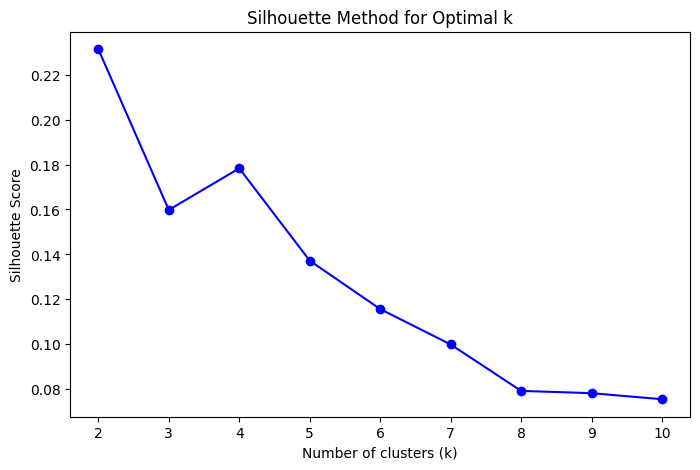

In [22]:
plt.figure(figsize=(8,5))
plt.plot(K,silhouette_scores,'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

C:\Users\jaswa\AppData\Local\Temp\ipykernel_25884\2164119606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cluster_2'] = kmedoids_2.fit_predict(df_scaled)


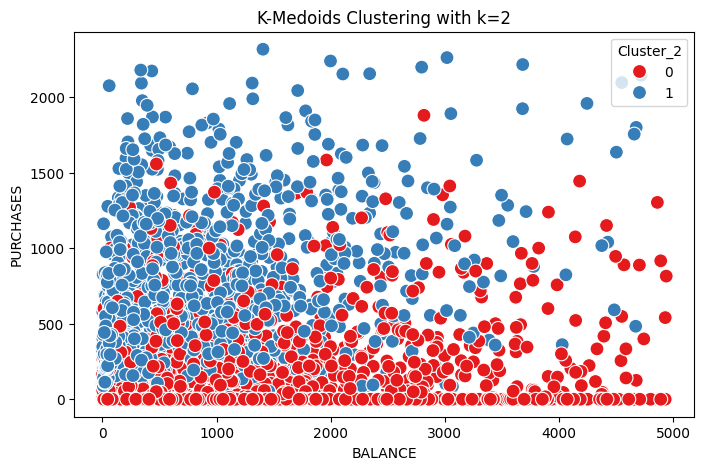

In [25]:
kmedoids_2 = KMedoids(n_clusters=2, random_state=42)
df_no_outliers['Cluster_2'] = kmedoids_2.fit_predict(df_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_no_outliers['BALANCE'],
                y=df_no_outliers['PURCHASES'],
                hue=df_no_outliers['Cluster_2'],
                palette='Set1',
                s=100)
plt.title('K-Medoids Clustering with k=2')
plt.show()
